### Importando Bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

### Vizualização dos dados

In [2]:
df = pd.read_csv("data.csv", encoding="utf-8", sep=",", low_memory=False)
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


### Tratamento dos dados

In [3]:
X = df.iloc[:,2:-1]
y = df.iloc[:,1]
y = y.replace({"B": 0, "M" : 1})


In [4]:
display(X.head(4))
display(y.head(4))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


0    1
1    1
2    1
3    1
Name: diagnosis, dtype: int64

### Divisão entre Treino e Teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 10)

In [6]:
y_test

172    1
553    0
374    0
370    1
419    0
      ..
108    1
458    0
173    0
240    0
436    0
Name: diagnosis, Length: 171, dtype: int64

### Redução Dimensionalidade com PCA:
*Para a aplicação do PCA é importante lembrar que primeiro devemos aplicar
o Standard Scaler, usando fit_transform na base de treino, mas apenas
transform na base de teste:

In [7]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)



*A seguir é possível aplicar a transformação com PCA nos dados já
escalonados:

In [8]:
pca = PCA(n_components=10, random_state=10)
pca.fit(X_train_scaled)
display(pca)

PCA(n_components=10, random_state=10)

### Este gráfico ajuda a determinar o menor número de componentes que ainda captura a maior parte da variabilidade dos dados

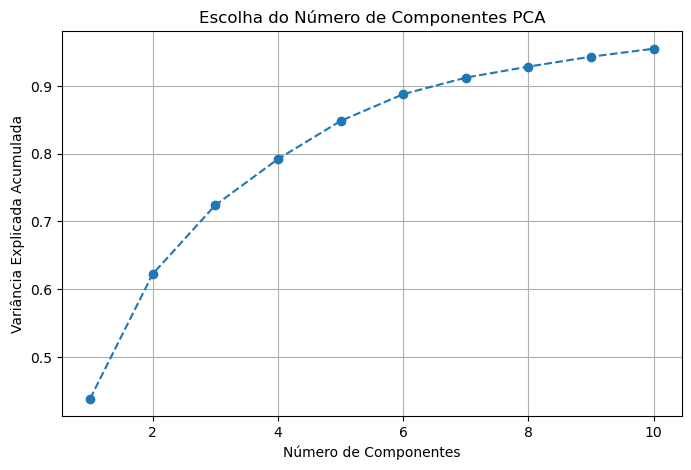

In [9]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Escolha do Número de Componentes PCA")
plt.grid()
plt.show()

### Mostra a variância explicada por cada componente individualmente

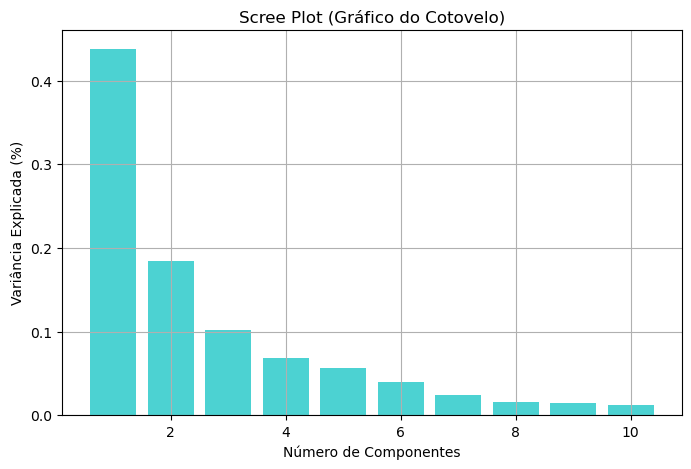

In [10]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='c', alpha=0.7)
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada (%)")
plt.title("Scree Plot (Gráfico do Cotovelo)")
plt.grid()
plt.show()

### Redução de Dimensionalidade com PCA

In [20]:
pca = PCA(n_components= 3, random_state= 10)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


### Busca de Hiperparâmetros para Decision Tree com GridSearchCV


In [12]:
# Definindo modelo
clf = DecisionTreeClassifier(random_state=10)

# Definindo hiperparâmetros 
param_grid = {
    "max_depth": [3, None],
    "min_samples_split": [2,10]
}

# Executando GridSearch
grid_search = GridSearchCV(clf, param_grid, cv=5,scoring="accuracy")
grid_search.fit(X_train_pca, y_train)


# Melhor conjunto de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score:", grid_search.best_score_)

Melhores parâmetros: {'max_depth': 3, 'min_samples_split': 2}
Melhor score: 0.9219620253164557


In [14]:

df_results = pd.DataFrame(grid_search.cv_results_)

# Selecionar apenas os hiperparâmetros e o score médio
df_results = df_results[
    ["param_max_depth", "param_min_samples_split", "mean_test_score"]
]

# Ordenar do melhor para o pior
df_results = df_results.sort_values(by="mean_test_score", ascending=False)

In [15]:
df_results

,param_max_depth,param_min_samples_split,mean_test_score
0,3,2,0.921962
1,3,10,0.919430
2,None,2,0.919430
3,None,10,0.911867


In [16]:
 grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=10)

In [17]:
#Avaliar o melhor modelo nos dados de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)

In [21]:
print(f'''Melhor modelo {best_model}
Acuracia {test_accuracy}
''')

Melhor modelo DecisionTreeClassifier(max_depth=3, random_state=10)
Acuracia 0.9473684210526315



### Otimização de Decision Tree com Grid Search

In [19]:
# 📌 Definir os melhores hiperparâmetros da árvore encontrados no GridSearch
best_params = {
    "max_depth": 3,  
    "min_samples_split": 2  
}

# 📌 Criar o modelo base de Árvore de Decisão com os melhores parâmetros
base_tree = DecisionTreeClassifier(**best_params, random_state=10)

# 📌 Criar o modelo Bagging com a árvore de decisão como base
bagging_model = BaggingClassifier(
    estimator=base_tree,  # ✅ Correto! Passamos um modelo, não um dicionário
    n_estimators=100,
    random_state=10
)

# 📌 Treinar o modelo Bagging
bagging_model.fit(X_train_pca, y_train)

# 📌 Fazer previsões
y_pred = bagging_model.predict(X_test_pca)

# 📌 Avaliar o modelo
from sklearn.metrics import accuracy_score
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.9590643274853801
